# Spaceship Titanic
##### 서기 2912년, 여러분의 데이터 과학 기술이 우주 미스터리를 해결하는 데 필요합니다. 우리는 4광년 떨어진 곳에서 전송된 신호를 받았고, 상황이 좋지 않습니다.


우주여객선 타이타닉은 한 달 전 출항한 성간 여객선입니다. 약 13,000명의 승객을 태운 이 선박은 우리의 태양계에서 새로이 거주 가능한 세 개의 외계행성을 향해 첫 항해를 시작했습니다.   

첫 목적지인 55 Cancri E를 향해 알파 센타우리 주위를 돌고 있을 때, 주의하지 못한 우주여객선 타이타닉은 먼지 구름 속에 숨겨져 있던 시공간 이상 현상과 충돌했습니다. 슬프게도, 1000년 전의 동명선처럼 비극적인 운명을 맞이하게 되었습니다. 비록 선박은 그대로 남아 있었지만, 승객의 절반이 다른 차원으로 전송되었습니다.   

구조대가 실종된 승객들을 구출하고 회수할 수 있도록, 손상된 우주선 컴퓨터 시스템에서 복구한 기록을 사용하여 이상 현상에 의해 전송된 승객을 예측하는 것이 도전 과제입니다.   

그들을 구하고 역사를 바꾸는 데 도움을 주세요!   



열 설명
- `PassengerId`: 각 승객의 고유 ID입니다. ID는 gggg_pp 형식을 따르며, 여기서 gggg는 승객이 함께 여행하는 그룹을 나타내고 pp는 그룹 내에서의 번호입니다. 그룹 내 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
- `HomePlanet`: 승객이 출발한 행성으로, 보통은 그들의 영구 거주 행성입니다.
- `CryoSleep`: 승객이 항해 기간 동안 냉동 수면 상태에 들어가기로 선택했는지를 나타냅니다. 냉동 수면 상태의 승객은 객실에 갇혀 있습니다.
- `Cabin`: 승객이 머무는 객실 번호입니다. deck/num/side 형식을 따르며, 여기서 side는 Port(P) 또는 Starboard(S)일 수 있습니다.
- `Destination`: 승객이 하차할 행성입니다.
- `Age`: 승객의 나이입니다.
- `VIP`: 승객이 항해 중 특별 VIP 서비스를 위해 추가 비용을 지불했는지를 나타냅니다.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: 승객이 우주여객선 타이타닉의 여러 럭셔리 시설에서 청구된 금액입니다.
- `Name`: 승객의 이름과 성입니다.
- `Transported`: 승객이 다른 차원으로 전송되었는지를 나타냅니다. 이는 예측해야 할 대상 열입니다.

metric - accuracy

### 본인의 Insight 설정, 검증 및 시각화
1. 수면 상태이면 전송됐을 확률이 높을 것
1. 딥러닝 기법이 머신러닝 기법보다 정확도가 높을 것

### 차별화된 나의 방법
1. plotly / seaborn을 이용한 corr 분석 및 다양한 시각화 
1. 머신러닝 뿐만 아니라 딥러닝 기법도 그리드 서치

# Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from kerastuner.tuners import RandomSearch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

C:\Users\Administrator\AppData\Local\Temp\ipykernel_49608\3726911857.py:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Dataset

In [2]:
# Load a dataset into a Pandas Dataframe
dataset_df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# EDA

In [3]:
# 정보 확인
dataset_df.info()
# 데이터 확인
dataset_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# 각 데이터의 분포 확인


In [5]:
fig = make_subplots(rows=6, cols=1, shared_xaxes=False, vertical_spacing=0.1, subplot_titles=("Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"))

fig.add_trace(go.Histogram(x=dataset_df['Age'], nbinsx=50, marker_color='orange', name='Age'), row=1, col=1)
fig.add_trace(go.Histogram(x=dataset_df['FoodCourt'], nbinsx=50, marker_color='yellow', name='FoodCourt'), row=2, col=1)
fig.add_trace(go.Histogram(x=dataset_df['ShoppingMall'], nbinsx=50, marker_color='blue', name='ShoppingMall'), row=3, col=1)
fig.add_trace(go.Histogram(x=dataset_df['Spa'], nbinsx=50, marker_color='green', name='Spa'), row=4, col=1)
fig.add_trace(go.Histogram(x=dataset_df['VRDeck'], nbinsx=50, marker_color='pink', name='VRDeck'), row=5, col=1)
fig.add_trace(go.Histogram(x=dataset_df['Transported'], nbinsx=50, marker_color='black', name='Transported'), row=6, col=1)

fig.update_layout(height=1200, width=800, title_text="Histograms of Features", showlegend=False)
fig.update_yaxes(title_text="Count")

# 그래프를 보여줍니다.
fig.show()


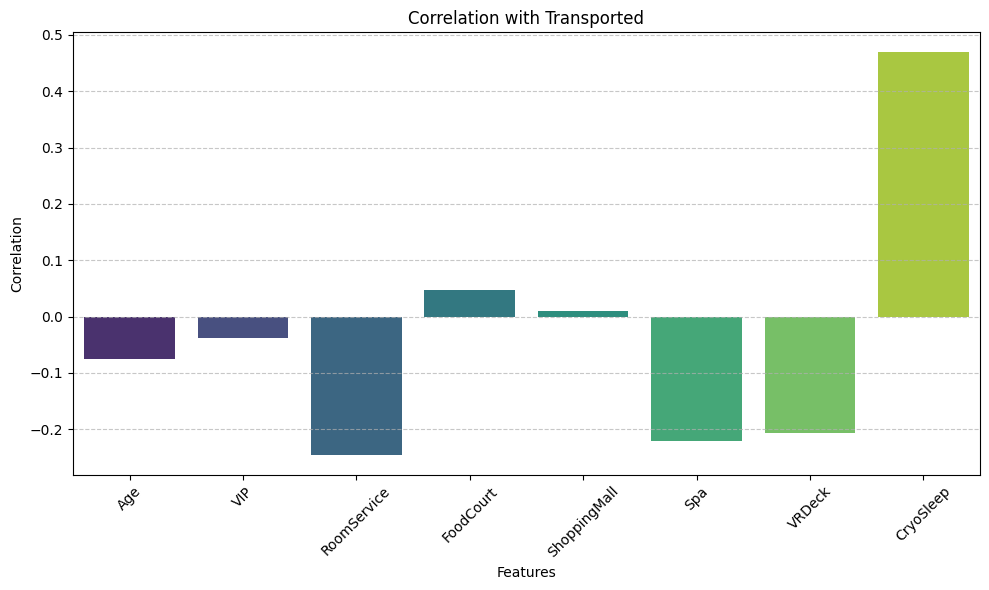

In [6]:
# 수치형 데이터와 Transported와의 상관관계
correlations = dataset_df[['Age', 'VIP', 'RoomService', 'FoodCourt', 
                           'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 
                           'Transported']].corr()['Transported'][:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.title('Correlation with Transported')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Preprocessing

학습에 필요없는 열(`PassengerId`/ `Name`) 제거

In [7]:
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)

결측치 처리 과정

In [8]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [9]:
mean_value = dataset_df[['Age', 'VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean() 
dataset_df = dataset_df.fillna(method='backfill')
dataset_df.isnull().sum().sort_values(ascending=False)
dataset_df = dataset_df.dropna() # 나머지는 그냥 삭제

In [10]:
dataset_df['Transported'] = dataset_df['Transported'].astype(int)
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)

Cabin 열의 값은 Deck/Cabin_num/Side와 같은 형식의 문자열입니다.   
이 열을 분할하여 Deck, Cabin_num, Side라는 새로운 열을 생성합니다.

In [11]:
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)
dataset_df = dataset_df.drop('Cabin', axis=1)

# Model

이진 분류에 적합한 모델을 사용합니다. 기존 타이타닉에서 성능이 가장 좋았던 XGBoost와 RandomForest를 사용했습니다. 

* XGBoost (Extreme Gradient Boosting)
XGBoost는 Gradient Boosting 알고리즘의 변형으로, 여러 개의 결정 트리를 조합하여 강력한 예측 모델을 만드는 알고리즘입니다. 특히 그라디언트 부스팅을 사용하여 약한 모델들을 순차적으로 결합하면서 오차를 줄여나가는 방식으로 동작합니다. XGBoost는 자동적으로 특성 중요도를 평가하고, 튜닝이 쉬운 장점이 있습니다.

* RandomForest
RandomForest는 앙상블 학습 방법 중 하나로, 여러 개의 결정 트리들을 독립적으로 학습시킨 후 그들의 평균을 통해 예측을 수행합니다. 각 트리는 부트스트랩 샘플링으로 생성된 데이터에서 학습되며, 무작위성을 통해 다양한 트리를 만듭니다. 이는 과적합을 줄이고 예측 성능을 향상시키는 데 도움을 줍니다.

In [12]:
encoder = OrdinalEncoder()

X_train, y_train = dataset_df.drop(['Transported'], axis=1), dataset_df['Transported']
X_train['HomePlanet'] = encoder.fit_transform(X_train[['HomePlanet']])
X_train['Destination'] = encoder.fit_transform(X_train[['Destination']])
X_train['Deck'] = encoder.fit_transform(X_train[['Deck']])
X_train['Cabin_num'] = encoder.fit_transform(X_train[['Cabin_num']])
X_train['Side'] = encoder.fit_transform(X_train[['Side']])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Deck          8693 non-null   float64
 11  Cabin_num     8693 non-null   float64
 12  Side          8693 non-null   float64
dtypes: float64(11), int32(2)
memory usage: 815.1 KB


In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
def build_model(hp):
    model = Sequential()
    
    # 입력 레이어와 첫 번째 은닉층
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    
    # 추가적인 은닉층들
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    
    # 출력 레이어
    model.add(Dense(units=1, activation='sigmoid'))
    
    # 모델 컴파일
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss=BinaryCrossentropy(),
                  metrics=[BinaryAccuracy()])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_binary_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='dnn_tuner',
    project_name='titanic_transportation'
)

tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# 최적의 모델과 하이퍼파라미터 출력
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters)



Reloading Tuner from dnn_tuner\titanic_transportation\tuner0.json
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000002C2EB585CC0>


In [15]:
# 1. XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

xgb_grid_search = GridSearchCV(XGBClassifier(), xgb_param_grid, verbose=2)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation accuracy for XGBoost:", xgb_grid_search.best_score_)

# 2. RandomForest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, verbose=2)
rf_grid_search.fit(X_train, y_train)

print("Best parameters for RandomForest:", rf_grid_search.best_params_)
print("Best cross-validation accuracy for RandomForest:", rf_grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

In [17]:
# XGBoost 예측
xgb_best_model = XGBClassifier(**xgb_grid_search.best_params_)
xgb_best_model.fit(X_train, y_train)
xgb_predictions = xgb_best_model.predict(X_val)

# RandomForest 예측
rf_best_model = RandomForestClassifier(**rf_grid_search.best_params_)
rf_best_model.fit(X_train, y_train)
rf_predictions = rf_best_model.predict(X_val)

# Calculate accuracy for XGBoost
xgb_accuracy = accuracy_score(y_val, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Calculate accuracy for RandomForest
rf_accuracy = accuracy_score(y_val, rf_predictions)
print(f"RandomForest Accuracy: {rf_accuracy:.4f}")


XGBoost Accuracy: 0.7849
RandomForest Accuracy: 0.7941


# Submission

In [18]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
2333,0.0,0,2.0,28.0,0,0.0,55.0,0.0,656.0,0.0,1.0,1773.0,1.0
2589,0.0,0,2.0,17.0,0,0.0,1195.0,31.0,0.0,0.0,5.0,1348.0,0.0
8302,1.0,1,0.0,28.0,0,0.0,0.0,0.0,0.0,0.0,2.0,1075.0,1.0
8177,2.0,0,2.0,20.0,0,0.0,2.0,289.0,976.0,0.0,5.0,848.0,0.0
500,1.0,1,0.0,36.0,0,0.0,0.0,0.0,0.0,0.0,2.0,846.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,1,2.0,18.0,0,14.0,2.0,144.0,610.0,0.0,6.0,1804.0,1.0
5191,2.0,0,2.0,50.0,0,690.0,0.0,30.0,762.0,428.0,5.0,72.0,1.0
5390,0.0,0,1.0,22.0,0,158.0,0.0,476.0,0.0,26.0,5.0,214.0,0.0
860,2.0,0,2.0,34.0,0,379.0,0.0,1626.0,0.0,0.0,5.0,922.0,0.0


In [19]:
submission_id = test.PassengerId
test = test.fillna(method='backfill')
test = test.drop(['Name','PassengerId'], axis=1)
test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand=True)
test = test.drop('Cabin', axis=1)
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

test['HomePlanet'] = encoder.fit_transform(test[['HomePlanet']])
test['Destination'] = encoder.fit_transform(test[['Destination']])
test['Deck'] = encoder.fit_transform(test[['Deck']])
test['Cabin_num'] = encoder.fit_transform(test[['Cabin_num']])
test['Side'] = encoder.fit_transform(test[['Side']])

# Get the predictions for testdata
predictions = best_model.predict(test)
n_predictions = (predictions > 0.5).astype(bool)

134/134 [==============================] - 1s 759us/step


In [20]:
# XGBoost 예측
xgb_best_model = XGBClassifier(**xgb_grid_search.best_params_)
xgb_best_model.fit(X_train, y_train)
xgb_predictions = xgb_best_model.predict(test)

# RandomForest 예측
rf_best_model = RandomForestClassifier(**rf_grid_search.best_params_)
rf_best_model.fit(X_train, y_train)
rf_predictions = rf_best_model.predict(test)

# 예측 결과 출력
print("XGBoost 예측 결과:", xgb_predictions)
print("RandomForest 예측 결과:", rf_predictions)

XGBoost 예측 결과: [1 0 1 ... 1 1 1]
RandomForest 예측 결과: [0 0 1 ... 1 1 0]


In [22]:
submission['Transported'] = n_predictions
submission.to_csv('DL_submission.csv', index=False)
submission['Transported'] = xgb_predictions.astype(bool)
submission.to_csv('XGB_submission.csv', index=False)
submission['Transported'] = rf_predictions.astype(bool)
submission.to_csv('RF_submission.csv', index=False)
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


# 결론
|model|DNN|XGBoost|RandomForest|
|---|---|---|---|
|accuracy|0.78700|0.79962|0.78793|

1. 수면 상태이면 전송됐을 확률이 높을 것 : 양의 상관관계를 예측했는데 이는 예상대로였습니다. 
1. 딥러닝 기법이 머신러닝 기법보다 정확도가 높을 것 : 딥러닝 기법 보다는 머신러닝 기법의 정확도가 더 좋았습니다.
1. plotly / seaborn을 이용한 corr 분석 및 다양한 시각화 : EDA 과정에서 히스토그램을 확인하였고 상관관계 별로 비교를 위해 bar 차트를 그렸습니다.  
1. 머신러닝 뿐만 아니라 딥러닝 기법도 그리드 서치 : 이번 과제를 통하여 그리드 서치에 좀 더 익숙해졌으며 기존에 사용해본 적 없는 딥러닝 그리드 서치를 사용했습니다. 